# **Dataset vendite storiche**
## Obiettivo
Lavorare su un dataset di vendite storiche per capire la struttura dei dati, pulirli, analizzarli e realizzare previsioni semplici dei prossimi giorni usando Pandas e Python puro.

## **1. Caricamento e esplorazione dati**
Tabelle con raggruppamenti per prodotto, vendite giornaliere e mensili.

In [2]:
# === AGGREGAZIONI ===
# Importiamo le librerie necessarie: pandas, numpy e matplotlib.
# Creiamo un dataset con le colonne: "Data", "Prodotto", "Vendite" e "Prezzo".
# Puliamo i dati andando a sostituire i valori mancanti, rimuovere i duplicati e convertire i tipi di dato.
# Calcoliamo le vendite totali per prodotto, le vendite giornaliere e le vendite mensili (all'interno della colonna "Mese")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulazione dataset vendite storiche
data = {
    "Data": pd.date_range(start="2024-01-01", periods=30),
    "Prodotto": ["A","B","C","A","B","C","A","B","C","A","B","C","A","B","C","A","B","C","A","B","C","A","B","C","A","B","C","A","B","C"],
    "Vendite": [10, 5, 2, 12, 6, 3, np.nan, 7, 4, 11, 5, 2, 13, 6, 3, 14, 7, 4, 12, 5, 2, 13, 6, 3, 10, 5, 2, 12, 6, 3],
    "Prezzo": [100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200, 100, 150, 200]
}

df = pd.DataFrame(data)

# Pulizia dati
df["Vendite"] = df["Vendite"].fillna(df["Vendite"].mean()) # Gestione valori mancanti
df = df.drop_duplicates()                                  # Rimuovere duplicati
df["Data"] = pd.to_datetime(df["Data"])                    # Assicuriamo che le date siano in datetime
df["Vendite"] = df["Vendite"].astype(float)                # Conversione in float
df["Prezzo"] = df["Prezzo"].astype(float)                  # Conversione in float

# Aggregazioni
totali_per_prodotto = df.groupby("Prodotto")["Vendite"].sum().reset_index() # Aggrega le vendite per prodotto
vendite_giornaliere = df.groupby("Data")["Vendite"].sum().reset_index()     # Media giornaliera delle vendite totali
df["Mese"] = df["Data"].dt.to_period("M")                                   # Aggiunta colonna “Mese” per aggregare per mese.
vendite_mensili = df.groupby("Mese")["Vendite"].sum().reset_index()         # Vendite mensili totali

print(totali_per_prodotto)
print(vendite_giornaliere.head())
print(vendite_mensili)


  Prodotto     Vendite
0        A  113.655172
1        B   58.000000
2        C   28.000000
        Data  Vendite
0 2024-01-01     10.0
1 2024-01-02      5.0
2 2024-01-03      2.0
3 2024-01-04     12.0
4 2024-01-05      6.0
      Mese     Vendite
0  2024-01  199.655172


## **2. Grafici**
Visualizzazione trend storico, vendite mensili e confronto previsioni.

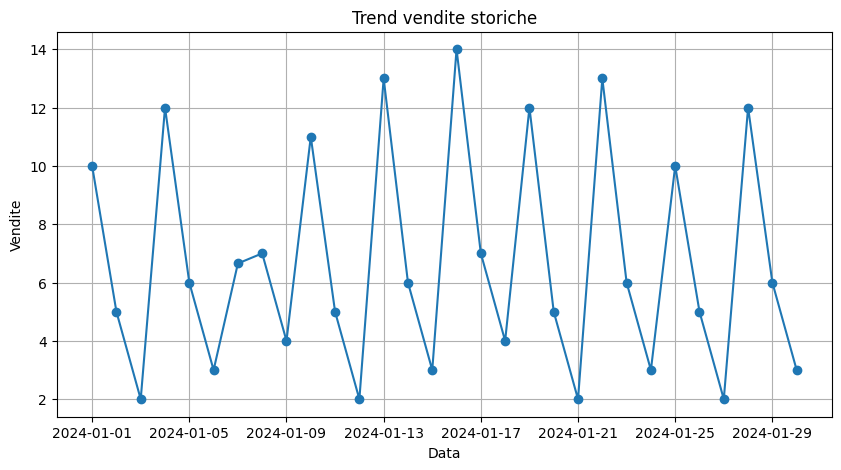

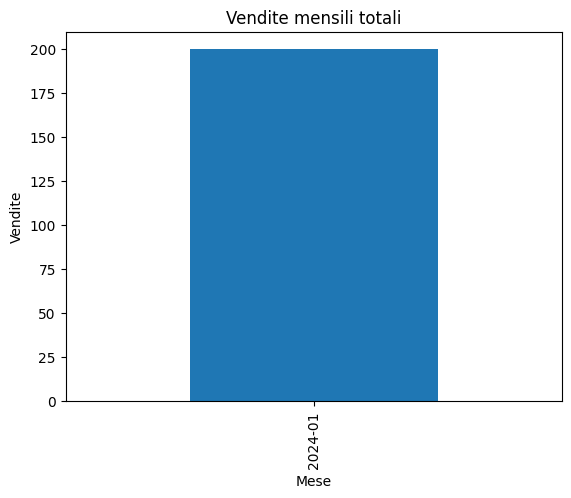

In [ ]:
# === Grafici ===
# Creiamo un grafico a linea per vedere le vendite storiche nel tempo
# Creiamo un grafico a barre per visualizzare le vendite mensili totali

plt.figure(figsize=(10,6))
plt.plot(df["Data"], df["Vendite"], label="Storico")
plt.title("Trend vendite storiche")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.grid(True)
plt.show()

vendite_mensili.plot(kind="bar", title="Vendite mensili totali")
plt.ylabel("Vendite")
plt.show()


## **3. Tabelle**
Previsioni di prodotto e vendite in un arco temporale di 7 giorni.

        Data  Vendite_Prev_Media  Vendite_Prev_Ultimo
0 2024-01-31            6.655172                  3.0
1 2024-02-01            6.655172                  3.0
2 2024-02-02            6.655172                  3.0
3 2024-02-03            6.655172                  3.0
4 2024-02-04            6.655172                  3.0
5 2024-02-05            6.655172                  3.0
6 2024-02-06            6.655172                  3.0


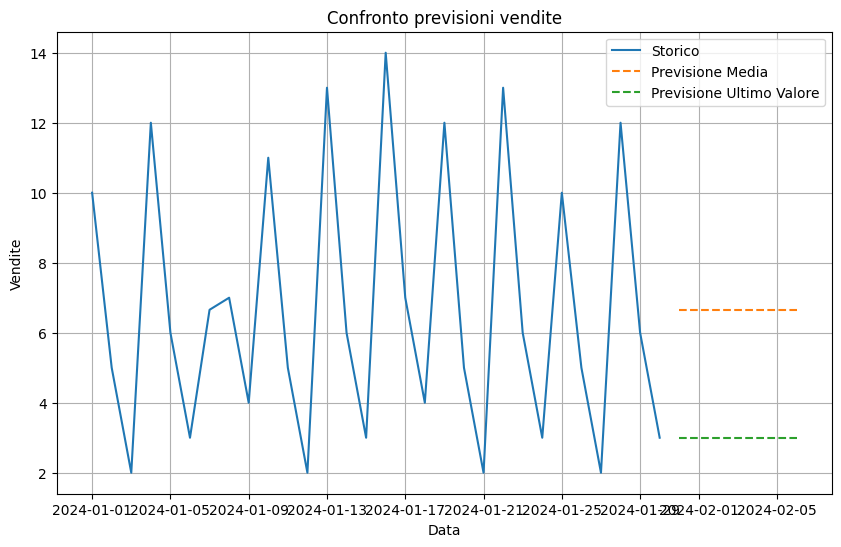

In [ ]:
# === Tabelle ===
# Creiamo una media storica e ci ricaviamo l'ultimo valore noto.
# Usiamo questi due nuovi dati per ricavare una previsione media per i prossimi 7 giorni.
# Creiamo infine un DataFrame con le previsioni e un grafico per confrontare i dati storici con le nostre previsioni.

media_storica = df["Vendite"].mean()
ultimo_valore = df["Vendite"].iloc[-1]

future_days = pd.date_range(start=df["Data"].max() + pd.Timedelta(days=1), periods=7)

previsione_media = pd.DataFrame({"Data": future_days, "Vendite_Prev_Media": [media_storica]*7})
previsione_ultimo = pd.DataFrame({"Data": future_days, "Vendite_Prev_Ultimo": [ultimo_valore]*7})

previsioni = previsione_media.merge(previsione_ultimo, on="Data")
print(previsioni)

# Grafico confronto previsioni
plt.figure(figsize=(10,6))
plt.plot(df["Data"], df["Vendite"], label="Storico")
plt.plot(previsione_media["Data"], previsione_media["Vendite_Prev_Media"], label="Previsione Media", linestyle="--")
plt.plot(previsione_ultimo["Data"], previsione_ultimo["Vendite_Prev_Ultimo"], label="Previsione Ultimo Valore", linestyle="--")
plt.title("Confronto previsioni vendite")
plt.xlabel("Data")
plt.ylabel("Vendite")
plt.legend()
plt.grid(True)
plt.show()


## **4. Relazione Finale**

## **Descrizione Dataset**
- 30 righe, 4 colonne: "Data", "Prodotto", "Vendite", "Prezzo".
- Problemi riscontrati: 1 valore mancante in "Vendite".

## **Pulizia Dati**
- Media per valori mancanti.
- Rimozione duplicati (assenti).
- Conversione tipi: "Data" in datetime, "Vendite"/"Prezzo" in float.

## **Previsioni**
- **Metodo 1: Media storica** --> assume che le vendite future siano simili alla media passata.
- **Metodo 2: Ultimo valore osservato** --> assume che le vendite rimangano costanti come nell’ultimo giorno.

## **Confronto Metodologie**
- La *media storica* offre maggiore stabilità e reagisce poco alle fluttuazioni.
- L’*ultimo valore osservato* segue il trend recente, ma può essere poco affidabile in caso di forti variazioni.

## **Conclusione**
In conclusione abbiamo appreso che nel dataset in questione, la *media storica* appare più affidabile;
tuttavia, entrambi i metodi sono piuttosto semplici e non tengono conto né della stagionalità né dei trend.